Dataset Head:
   Size  Location  Number of Rooms          Price
0  4174  suburban                7  215899.752784
1  4507  suburban                9  245672.536972
2  1860  suburban                7  109930.724733
3  2294  suburban                1  109556.485820
4  2130  suburban                1  127157.745111

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Size             100 non-null    int64  
 1   Location         100 non-null    object 
 2   Number of Rooms  100 non-null    int64  
 3   Price            100 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB
None

Missing Values:
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64


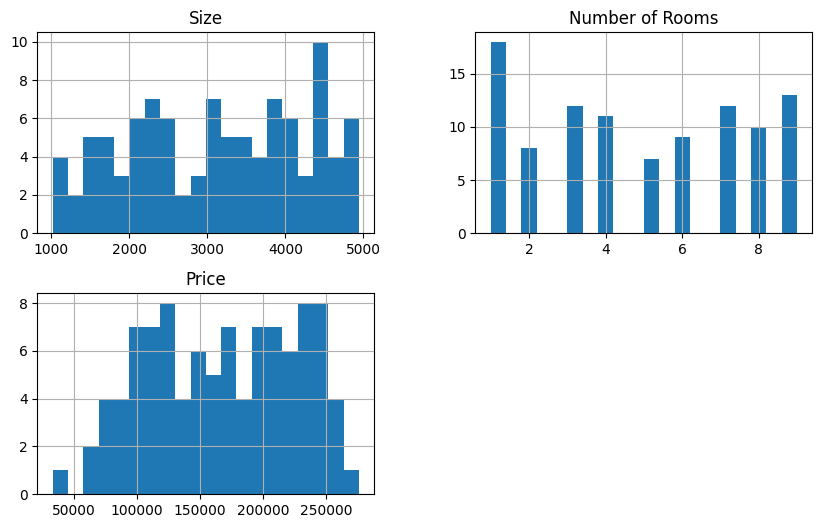

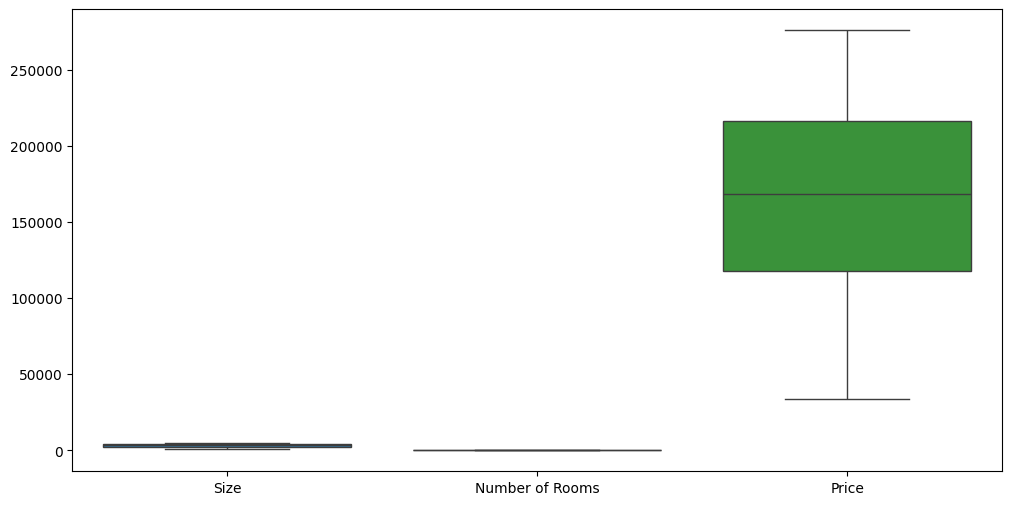


Correlation Matrix:
                       Size  Number of Rooms     Price  Location_suburban  \
Size               1.000000         0.122567  0.982893          -0.036564   
Number of Rooms    0.122567         1.000000  0.191785           0.205338   
Price              0.982893         0.191785  1.000000          -0.040077   
Location_suburban -0.036564         0.205338 -0.040077           1.000000   
Location_urban     0.091887        -0.086052  0.113086          -0.446270   

                   Location_urban  
Size                     0.091887  
Number of Rooms         -0.086052  
Price                    0.113086  
Location_suburban       -0.446270  
Location_urban           1.000000  


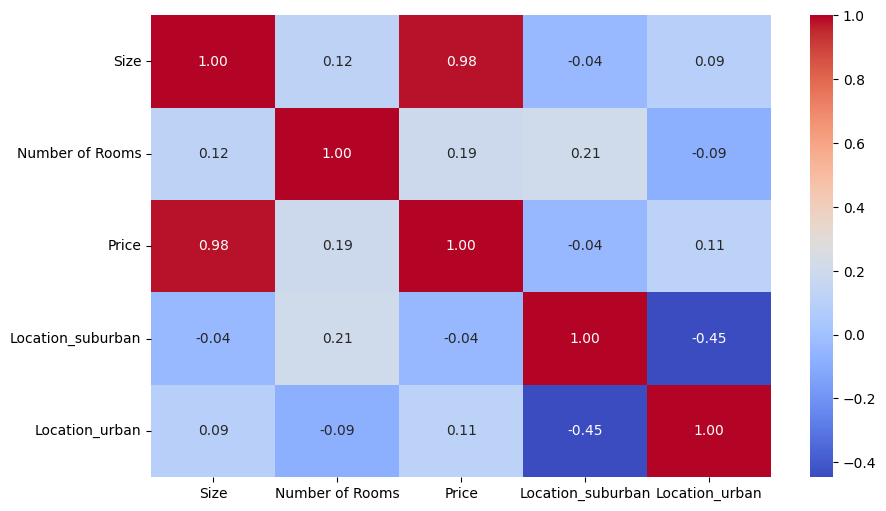


Model Evaluation Metrics:
Root Mean Square Error (RMSE): 9296.128160303717
R² (Coefficient of Determination): 0.974667643461151


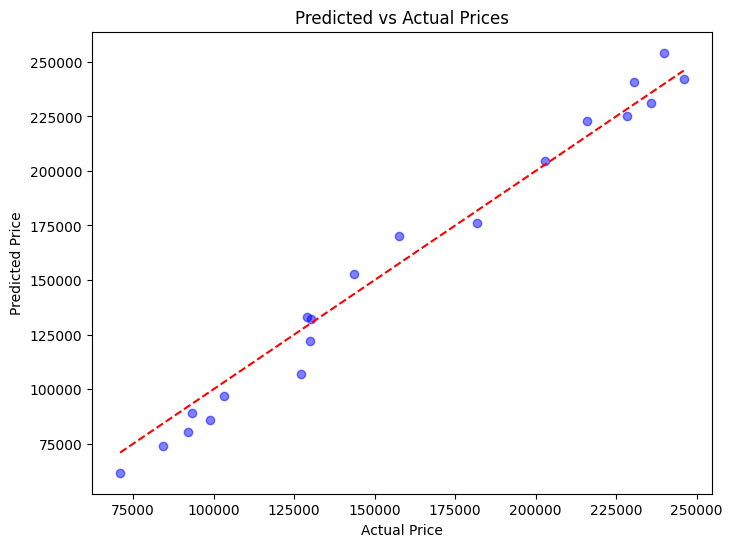


Feature Importance (Coefficients):
                     Importance
Size               57863.380779
Number of Rooms     4541.685132
Location_urban      2669.015624
Location_suburban   -910.548401

Expected Insights:
- Correlation between Size, Number of Rooms, and Price:
Price                1.000000
Size                 0.982893
Number of Rooms      0.191785
Location_urban       0.113086
Location_suburban   -0.040077
Name: Price, dtype: float64
- Effect of Location on Pricing:
Location_urban
False    162543.661729
True     176351.297067
Name: Price, dtype: float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and Explore the Dataset
# Load the dataset
df = pd.read_csv("E:\\New folder\\house_prices (1).csv")

# Inspect the dataset
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 2: Data Preprocessing
# Handle missing values (if any)
df = df.dropna()  # or you can fill missing values using df.fillna()

# Analyze distributions of numerical variables
df[['Size', 'Number of Rooms', 'Price']].hist(bins=20, figsize=(10, 6))
plt.show()

# Identify potential outliers using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Size', 'Number of Rooms', 'Price']])
plt.show()

# Normalize Numerical Data
# Scaling Size and Number of Rooms
scaler = StandardScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

# Encode Categorical Features
# One-Hot Encoding for 'Location'
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

# Step 3: Feature Selection (Correlation Analysis)
# Analyze correlation between features and target variable
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Step 4: Model Training
# Train-Test Split
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R² (Coefficient of Determination): {r2}")

# Plotting Predicted vs Actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual Prices')
plt.show()

# Step 6: Feature Insights
# Get feature importance from the model
feature_importance = pd.DataFrame(model.coef_, X.columns, columns=['Importance'])
print("\nFeature Importance (Coefficients):")
print(feature_importance.sort_values(by='Importance', ascending=False))

# Insights
print("\nExpected Insights:")
print("- Correlation between Size, Number of Rooms, and Price:")
print(correlation_matrix['Price'].sort_values(ascending=False))
print("- Effect of Location on Pricing:")
location_effect = df.groupby('Location_urban')['Price'].mean()  # Adjust for Location columns
print(location_effect)
